In [1]:
import numpy as np
import random
import pandas as pd

In [2]:
# load the data
pop = pd.read_csv('../../data/curated/vic_population_density_sa2.csv', index_col = 0)

pop = pop.drop(columns=["S/T name"])
pop = pop.drop(columns=["SA2 name"])
for y in range(2001, 2022):
    col_name = "population_density_of_"+str(y)
    pop[str(y)] = pop[col_name]
    pop = pop.drop(columns=[col_name])

pop = pop.melt(id_vars=["SA2 code"], 
        var_name="year", 
        value_name="population_rate")
pop.head()
# pop = pop.loc[pop['SA2 code']==201011001]
pop = pd.get_dummies(pop, columns=['SA2 code'])
pop
# pop.dtypes

,year,population_rate,SA2 code_201011001,SA2 code_201011002,SA2 code_201011005,SA2 code_201011006,SA2 code_201011007,SA2 code_201011008,SA2 code_201011481,SA2 code_201011482,...,SA2 code_217031471,SA2 code_217031472,SA2 code_217031473,SA2 code_217031474,SA2 code_217031475,SA2 code_217031476,SA2 code_217041477,SA2 code_217041478,SA2 code_217041479,SA2 code_217041480
0,2001,109.222011,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2001,927.177419,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2001,103.100775,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2001,121.461988,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2001,31.680993,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10957,2021,2.641610,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
10958,2021,2.133525,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
10959,2021,4.889096,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
10960,2021,359.967949,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [3]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

# define features and outcome
features = list(pop.columns)
features.remove('population_rate')
outcome = ['population_rate']

# partition data into training and test sets
X = pop[features]
y = pop[outcome]
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.7)# , random_state = 42)

# train model
reg = LinearRegression()
reg.fit(x_train, y_train)

# bootstrap predictions
accuracy = []
n_iterations = 1000
for i in range(n_iterations):
    x_test, y_test = resample(x_train, y_train, replace=True)
    # evaluate model
    r2_score = reg.score(x_test, y_test)
    accuracy.append(r2_score)

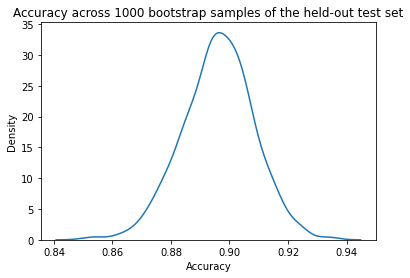

In [4]:
import seaborn as sns
# plot distribution of accuracy
sns.kdeplot(accuracy)
plt.title("Accuracy across 1000 bootstrap samples of the held-out test set")
plt.xlabel("Accuracy")
plt.show()

Model accuracy is reported on the test set. 1000 bootstrapped samples were used to calculate 95% confidence intervals.
Median accuracy is 0.90 with a 95% a confidence interval of [0.87,0.92].


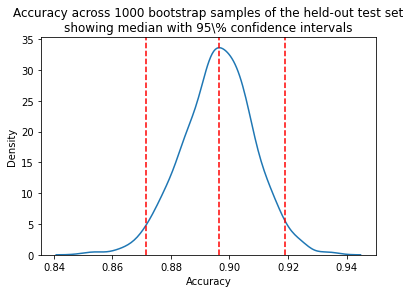

In [5]:
# get median
median = np.percentile(accuracy, 50)

# get 95% interval
alpha = 100-95
lower_ci = np.percentile(accuracy, alpha/2)
upper_ci = np.percentile(accuracy, 100-alpha/2)

print(f"Model accuracy is reported on the test set. 1000 bootstrapped samples " 
      f"were used to calculate 95% confidence intervals.\n"
      f"Median accuracy is {median:.2f} with a 95% a confidence "
      f"interval of [{lower_ci:.2f},{upper_ci:.2f}].")

sns.kdeplot(accuracy)
plt.title("Accuracy across 1000 bootstrap samples of the held-out test set\n"
          "showing median with 95\\% confidence intervals")
plt.xlabel("Accuracy")
plt.axvline(median,0, 14, linestyle="--", color="red")
plt.axvline(lower_ci,0, 14, linestyle="--", color="red")
plt.axvline(upper_ci,0, 14, linestyle="--", color="red")
plt.show()

## predict population per suburb from 2022-2027

In [95]:
raw = pd.read_csv('../../data/curated/vic_population_density_sa2.csv', index_col = 0)
sa2 = raw['SA2 code']

In [96]:
YEAR = [2022, 2023, 2024, 2025, 2026, 2027] # as we are predicting population for 2022-2027

In [97]:
all_year = []
for year in YEAR:
    for i in range(len(sa2)):
        all_year.append(year)
all_sa2 = list(sa2)*6


In [98]:
data = {
    'year':all_year,
    'SA2 code': all_sa2,
    'sa2_code': all_sa2
}
df = pd.DataFrame(data)
df
df2 = pd.get_dummies(df, columns=['SA2 code'])



In [99]:
features = list(df2.columns)
features.remove('sa2_code')
outcome = ['population_rate']
features

['year',
 'SA2 code_201011001',
 'SA2 code_201011002',
 'SA2 code_201011005',
 'SA2 code_201011006',
 'SA2 code_201011007',
 'SA2 code_201011008',
 'SA2 code_201011481',
 'SA2 code_201011482',
 'SA2 code_201011483',
 'SA2 code_201011484',
 'SA2 code_201021009',
 'SA2 code_201021010',
 'SA2 code_201021011',
 'SA2 code_201021012',
 'SA2 code_201031013',
 'SA2 code_201031014',
 'SA2 code_201031015',
 'SA2 code_201031016',
 'SA2 code_201031017',
 'SA2 code_202011018',
 'SA2 code_202011019',
 'SA2 code_202011020',
 'SA2 code_202011021',
 'SA2 code_202011022',
 'SA2 code_202011023',
 'SA2 code_202011024',
 'SA2 code_202011025',
 'SA2 code_202021026',
 'SA2 code_202021027',
 'SA2 code_202021028',
 'SA2 code_202021029',
 'SA2 code_202021030',
 'SA2 code_202021031',
 'SA2 code_202031032',
 'SA2 code_202031033',
 'SA2 code_203011034',
 'SA2 code_203011035',
 'SA2 code_203011036',
 'SA2 code_203021037',
 'SA2 code_203021039',
 'SA2 code_203021040',
 'SA2 code_203021042',
 'SA2 code_203021043',
 '

In [100]:
import numpy as np
# partition data into training and test sets
X_test = df2[features]
y_pred = reg.predict(X_test)
df['pred'] = np.round(y_pred,0)


In [101]:
df.columns
result = df.drop(columns = 'sa2_code')

In [102]:
import os

path = '../../data/curated/feature_prediction/'
if not os.path.exists(path):
    os.makedirs(path)

os.chdir
result.to_csv('../../data/curated/feature_prediction/22_27_population.csv')

In [103]:
result.columns

Index(['year', 'SA2 code', 'pred'], dtype='object')

In [104]:
result

,year,SA2 code,pred
0,2022,201011001,595.0
1,2022,201011002,1343.0
2,2022,201011005,533.0
3,2022,201011006,551.0
4,2022,201011007,415.0
...,...,...,...
3127,2027,217031476,542.0
3128,2027,217041477,559.0
3129,2027,217041478,570.0
3130,2027,217041479,861.0


In [105]:
#int_features = [float(x) for x in request.form.values()] #Convert string inputs to float.
#features = [np.array(int_features)]  #Convert to the form [[a, b]] for input to the model
#prediction = model.predict(features)  # features Must be in the form [[a, b]]
result[(result.year == 2023)&(result['SA2 code'] == 201011001)].pred

522    630.0
Name: pred, dtype: float64

## For Flask

In [106]:
import pickle
pickle.dump(reg, open('population_model.pkl','wb'))
model = pickle.load(open('population_model.pkl','rb'))

In [8]:
import geopandas as gpd
sf = gpd.read_file("../../data/raw/Geo/SA2_2021_AUST_SHP_GDA2020/SA2_2021_AUST_GDA2020.shp")
sf = sf.loc[sf["STE_CODE21"] == '2']
sa2_vic = sf[['SA2_NAME21','SA2_CODE21']]
sa2_vic.sort_values(by=['SA2_NAME21'])
sa2_vic.to_csv('../../data/curated/sa2_vic_2021.csv')




In [10]:
sf = gpd.read_file("../../data/raw/Geo/1270055001_sa2_2016_aust_shape/SA2_2016_AUST.shp")
sf = sf.loc[sf["STE_CODE16"] == '2']
sa2_vic = sf[['SA2_MAIN16','SA2_NAME16']]
sa2_vic.sort_values(by=['SA2_NAME16'])
sa2_vic.to_csv('../../data/curated/sa2_vic_2016.csv')

In [145]:
sa2_vic = sa2_vic.style.hide_index()

<ipython-input-145-56000b7b0319>:1: FutureWarning: this method is deprecated in favour of `Styler.hide(axis='index')`
  sa2_vic = sa2_vic.style.hide_index()


In [163]:
html = sa2_vic.to_html()
import os
# write html to file
path = '../../web/templates/html/'
if not os.path.exists(path):
    os.makedirs(path)
text_file = open("../../web/templates/html/sa2_name.html", "w")
text_file.write(html)
text_file.close()